### boxplot으로 셀프 주유소 가격 시각화

저번에 boxplot에 대해 배워봤을 겁니다. 그만큼 boxplot은 데이터의 전반적인 수치들을 확인하기에 편리한 시각화에요. 셀프 주유소가 정말로 저렴한지 boxplot으로 시각화해보겠습니다. 우선 matplotlib의 한글 문제를 처리하고 필요한 모듈들을 import 할게요.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import platform

path = "c:/Windows/Fonts/malgun.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

셀프 유무에 따른 가격을 확인해보겠습니다.

<AxesSubplot:title={'center':'가격'}, xlabel='셀프'>

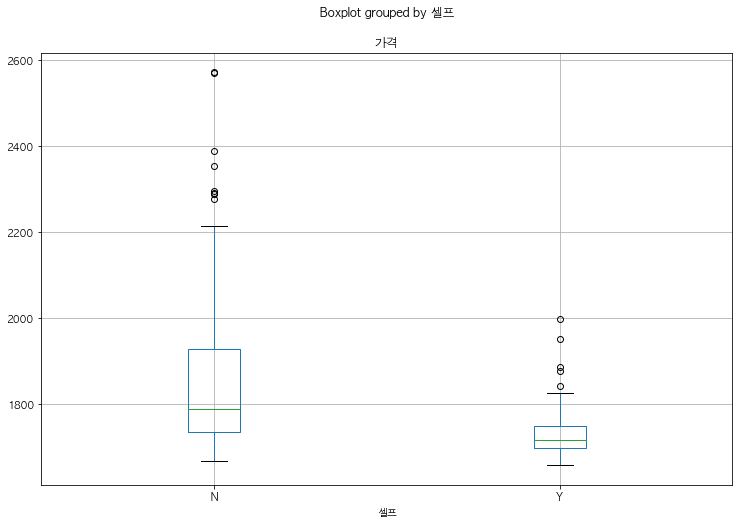

In [ ]:
stations.boxplot(column='가격', by='셀프', figsize=(12,8))

확실히 셀프 주유소가 싼 가격이란게 보이죠? 검은색 점들은 이상치라는 거고, 평균도 셀프주유소가 훨씬 낮고, 전반적으로 셀프 주유소가 더 싼 것을 알 수 있습니다.

이제는 상표에 따라서 boxplot을 시각화해볼게요.

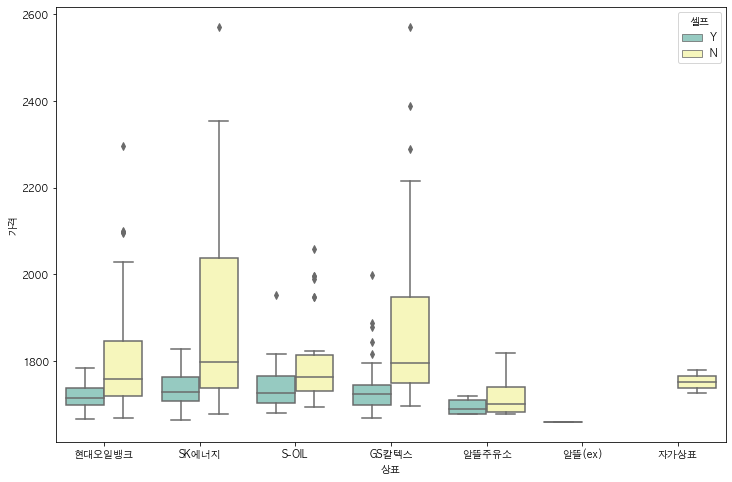

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', hue='셀프', data=stations, palette='Set3')
plt.show()

어헛, sk에너지가 상당히 비싸네요. 여기서도 같은 상표라도 셀프 주유소들이 더 싸게 가격이 분포되어 있고요, 알뜰 주유소가 알뜰이라는 이름 답게 싸다는 것 또한 알 수 있네요.

셀프 주유소인지 아닌지는 제외하고 상표로만 boxplot을 보겠습니다.

/Users/ddjinny/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


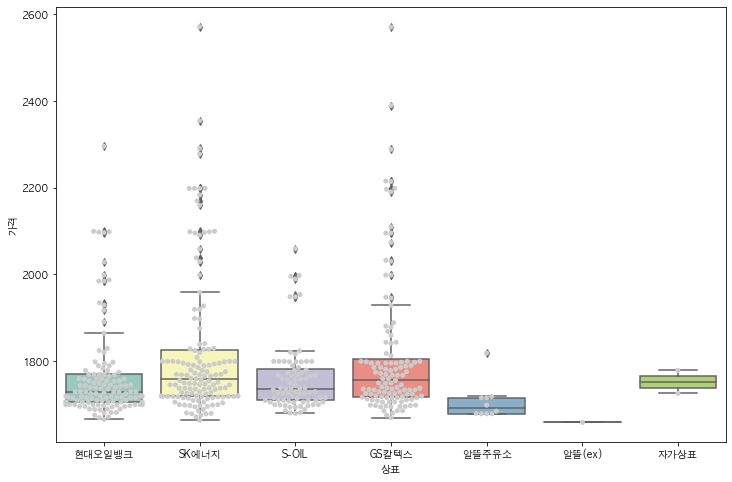

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(x='상표', y='가격', data=stations, palette='Set3')
sns.swarmplot(x='상표', y='가격', data=stations, color='.8')  # 1로 하면 환공포증 느낌...
plt.show()

1로 해보세요... 진짜 징그러워요...(소름) 아무튼 알뜰주유소 이용을 추천합니다ㅎㅎ 대기업들은 돈도 많으면서 더 비싸네요😅

결과적으로 '셀프 주유소는 더 저렴한가'는 맞다고 할 수 있네요! 요렇게 팩트체크를 완료해봤습니다.

### 서울시 구별 주유 가격 시각화

여기까지만 하면 아쉽잖아요. 그래서 구별로 가격의 정도를 시각화해보려고 합니다. 그래서 앞서 주소에서 구를 추출한 것이에요. 이전에 사용했던 json, folium, googlemaps를 사용해서 시각화해줄 겁니다. 필요한 모듈을 import 해줄게요.

In [ ]:
pip install googlemaps

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import json
import folium
import googlemaps
import warnings  # futurewarning 뜨지 않도록! 
warnings.simplefilter(action = "ignore", category = FutureWarning)

가격별로 먼저 제일 비싼곳부터 나열해볼게요. 딱 10개를 가져와보겠습니다.

In [ ]:
stations.sort_values(by='가격', ascending=False).head(10)

,Oil_store,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구
33,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구
11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구
32,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구


강남이 비쌀 줄 알았는데, 중구, 용산구 쪽에 비싼 주유소들이 많군요. 중구에는 광화문, 시청 등이 있어서 일까요. 상당히 비싸네요.

다음에는 저의 집이 서대문에 있어서 싼 주소가 어딨는지 알아봤어요.

In [ ]:
stations[stations['구'] == '서대문구'].sort_values(by='가격')

,Oil_store,주소,가격,셀프,상표,구
0,삼미상사(주)서부주유소,서울 서대문구 성산로 255,1680.0,Y,SK에너지,서대문구
1,구도일주유소 두꺼비,서울 서대문구 성산로 312,1680.0,Y,S-OIL,서대문구
2,(주)창원이엔지 홍제지점,서울 서대문구 통일로 455 (홍제동),1705.0,N,현대오일뱅크,서대문구
3,(주)미래아스팔트 신우주유소,서울 서대문구 가좌로 106 (홍은동),1707.0,Y,S-OIL,서대문구
4,(주)가재울뉴타운주유소,서울 서대문구 모래내로 205,1713.0,Y,현대오일뱅크,서대문구
5,현대오일뱅크(주)직영 연세주유소,서울 서대문구 연희로 184,1715.0,Y,현대오일뱅크,서대문구
6,행촌제2주유소,서울 서대문구 성산로 490 (대신동),1717.0,N,SK에너지,서대문구
7,남정주유소,서울 서대문구 모래내로 243 (남가좌동),1718.0,N,GS칼텍스,서대문구
8,지에스칼텍스(주)홍제동주유소,서울 서대문구 통일로 372,1733.0,Y,GS칼텍스,서대문구
9,현대오일뱅크㈜직영 독립문주유소,서울 서대문구 통일로 384 (홍제동),1738.0,N,현대오일뱅크,서대문구


오홍, 1번째 index가 우리집과 제일 가까운 곳이네요^6^

서울시에서 가장 낮은 주유소들을 어디에 있는지도 볼게요.

In [ ]:
stations.sort_values(by='가격', ascending=True).head(10)

,Oil_store,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구
0,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구
1,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구
0,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구
1,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구
0,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구


의외로 서초구, 양천구, 도봉구에 많군요!

하지만 단순히 10개의 데이터를 가지고 이런 구들이 비싸다 싸다를 말하긴 힘들죠. 그래서 평균을 내서 대체적인 가격을 비교해보겠습니다.

In [ ]:
# pivot table로 평균을 비교해 봅시다
import numpy as np 
gu_data = pd.pivot_table(stations, index=['구'], values=["가격"], aggfunc=np.mean)
gu_data.head()

,가격
구,
강남구,1920.617647
강동구,1802.785714
강북구,1696.769231
강서구,1757.718750
관악구,1775.500000


이것을 지도에 시각화해서 나타내보겠습니다.
[서울시 json 파일](https://drive.google.com/file/d/1wAkqegLTvrwB_NlxTy8pBi6hIS5miAyo/view?usp=sharing)을 다운 받고 코드를 작성해주세요!
그리고 json 파일을 저장해주신 디렉토리 경로를 넣어주면 됩니다.

In [ ]:
geo_path = '/Users/ddjinny/Documents/programming/Data-Science-Intro/week5/skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, 
                 tiles='Stamen Toner')

map.choropleth(geo_data = geo_str,
               data = gu_data,
               columns=[gu_data.index, '가격'],
               fill_color='PuRd', #PuRd, YlGnBu
               key_on='feature.id')
map

오호라 이렇게 하니, 확실히 중구와 용산구가 비싸네요. 거기다 종로구도 무척 비싸고, 강남구도 확실히 비싸네요.

### 서울시 주유 가격 상하위 10개 주유소 지도 시각화

이번에는 서울시에 있는 주유가격 상하위 10개 주유소를 지도에 표시해보도록 하겠습니다. 구별로 따지는게 아니라, 개별 주유소별로 따져보는 거에요. 상하위 10개 주유소만 따로 변수에 담아보겠습니다.

In [ ]:
oil_price_top10 = stations.sort_values(by='가격', ascending=False).head(10)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구
9,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구
33,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구
11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구
32,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구


In [ ]:
oil_price_bottom10 = stations.sort_values(by='가격', ascending=True).head(10)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구
0,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구
1,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구
0,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구
1,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구
0,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구


지도에 시각화 하려면 위도와 경도가 필요하니, 구글 맵키를 준비해주시구요.

In [ ]:
gmaps_key = "***********"
gmaps = googlemaps.Client(key=gmaps_key)

아래 코드를 입력하면 lat과 lng 정보를 모두 담아 oil_price_top10과 oil_price_bottom10에다 새로운 칼럼으로 담아줍니다. (코드는 교재에 실린 코드와는 다릅니다.)

    혹시 API Error가 발생한다면 최근에 google cloud platform의 약관이 바뀌어서 그럴 수 있습니다. 링크에 들어가서 본인의 구글맵스 플랫폼의 유료 사용 약관에 동의해 줍시다. 우리가 사용하는 정도로는 결재가 되지 않을거예요:)

In [ ]:
from tqdm import tqdm_notebook

lat = []
lng = []

for n in tqdm_notebook(oil_price_top10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_top10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_top10['lat'] = lat
oil_price_top10['lng'] = lng
oil_price_top10

<ipython-input-101-ad0a581241f4>:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_top10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
9,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구,37.558348,126.972090
12,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구,37.552290,126.968935
8,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구,37.560850,126.993653
7,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구,37.561648,126.997142
33,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구,37.517636,127.035756
11,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구,37.550179,126.972463
32,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구,37.511513,127.047093
32,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구,37.511513,127.047093
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구,37.560850,126.993653
31,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구,37.501402,127.059066


엇, 그런데 인덱스가 이상하네요. 8이 2번 들어가 있어요.

In [ ]:
lat = []
lng = []

for n in tqdm_notebook(oil_price_bottom10.index):
    # 주소를 '(' 기준으로 나눠 첫번째 주소만 가져와라 
    tmp_add = str(oil_price_bottom10['주소'][n]).split('(')[0]
    # tmp_add를 기준으로 주소를 입력해라 
    tmp_map = gmaps.geocode(tmp_add)

    # tmp_map의 첫번째 값에서 'geometry'를 구하고, 거기에서 다시 'location'을 구해라
    tmp_loc = tmp_map[0].get('geometry').get('location')
    lat.append(tmp_loc['lat'])
    lng.append(tmp_loc['lng'])

# 각각 새로운 컬럼 형성 
oil_price_bottom10['lat'] = lat
oil_price_bottom10['lng'] = lng
oil_price_bottom10

<ipython-input-102-77b146c20610>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(oil_price_bottom10.index):


  0%|          | 0/10 [00:00<?, ?it/s]

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구,37.459906,127.042060
0,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구,37.459906,127.042060
0,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구,37.459906,127.042060
1,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구,37.674434,127.044051
0,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구,37.459906,127.042060
2,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구,37.645005,127.032098
1,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구,37.674434,127.044051
0,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구,37.459906,127.042060
1,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구,37.674434,127.044051
0,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구,37.459906,127.042060


어, 그런데 하위 10개도 index가 이상하죠. 아마 병합하는 과정에서 인덱스를 재설정하지 않아서 이런 결과가 나타난 것 같아요. 이러면 이후가 문제가 생기게 돼요. 아래처럼 인덱스 별로 위도와 경도를 뽑아보면, 6번째 값부터 이상하게 추출이 되죠? 그러면 Folium에 넣었을 때 오류가 떠요!

In [ ]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.5583477, 126.9720901]
[37.5522895, 126.9689354]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]
[37.5616483, 126.9971419]
[37.51763589999999, 127.0357559]
[37.55017850000001, 126.9724626]
[32    37.511513
32    37.511513
Name: lat, dtype: float64, 32    127.047093
32    127.047093
Name: lng, dtype: float64]
[32    37.511513
32    37.511513
Name: lat, dtype: float64, 32    127.047093
32    127.047093
Name: lng, dtype: float64]
[8    37.56085
8    37.56085
Name: lat, dtype: float64, 8    126.993653
8    126.993653
Name: lng, dtype: float64]
[37.5014022, 127.059066]


그래서 이 문제를 해결하기 위해 index를 다시 설정해줍니다.

In [ ]:
oil_price_top10.reset_index(inplace=True)
oil_price_top10.drop('index',1,inplace=True)
oil_price_top10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,서남주유소,서울 중구 통일로 30,2571.0,N,SK에너지,중구,37.558348,126.972090
1,서계주유소,서울특별시 용산구 청파로 367 (청파동),2570.0,N,GS칼텍스,용산구,37.552290,126.968935
2,필동주유소,서울 중구 퇴계로 196 (필동2가),2389.0,N,GS칼텍스,중구,37.560850,126.993653
3,SK에너지(주) 퇴계로주유소,서울 중구 퇴계로 228 (필동2가),2354.0,N,SK에너지,중구,37.561648,126.997142
4,제이제이주유소,서울 강남구 언주로 716,2295.0,N,현대오일뱅크,강남구,37.517636,127.035756
5,동자동주유소,서울 용산구 한강대로104길 6 (동자동),2290.0,N,SK에너지,용산구,37.550179,126.972463
6,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),2288.0,N,GS칼텍스,강남구,37.511513,127.047093
7,선우상사Q엔느,서울 서초구 방배로 66 (방배동),2277.0,N,SK에너지,서초구,37.511513,127.047093
8,(주)대양씨앤씨 사직주유소,서울 종로구 사직로 65 (사직동),2215.0,N,GS칼텍스,종로구,37.560850,126.993653
9,(주)소모에너지 쎈트럴주유소,서울 강남구 삼성로 335,2214.0,N,GS칼텍스,강남구,37.501402,127.059066


In [ ]:
for n in oil_price_top10.index:
    print([oil_price_top10['lat'][n], oil_price_top10['lng'][n]])

[37.5583477, 126.9720901]
[37.5522895, 126.9689354]
[37.56084999999999, 126.9936529]
[37.5616483, 126.9971419]
[37.51763589999999, 127.0357559]
[37.55017850000001, 126.9724626]
[37.51151340000001, 127.0470928]
[37.51151340000001, 127.0470928]
[37.56084999999999, 126.9936529]
[37.5014022, 127.059066]


이제 잘 도출이 되네요! 그럼 하위 10개도 제대로 해줍시다.

In [ ]:
oil_price_bottom10.reset_index(inplace=True)
oil_price_bottom10.drop('index',1,inplace=True)
oil_price_bottom10

,Oil_store,주소,가격,셀프,상표,구,lat,lng
0,만남의광장주유소,서울 서초구 양재대로12길 73-71,1659.0,Y,알뜰(ex),서초구,37.459906,127.042060
1,(주)타이거오일 신정주유소,서울 양천구 중앙로 226 (신정동),1663.0,Y,SK에너지,양천구,37.459906,127.042060
2,(주)자연에너지 햇살주유소,서울 도봉구 방학로 142 (방학동),1665.0,Y,현대오일뱅크,도봉구,37.459906,127.042060
3,도봉제일주유소(주)송만에너지,서울 도봉구 도봉로 783 (도봉동),1669.0,N,현대오일뱅크,도봉구,37.674434,127.044051
4,수유동주유소,서울 강북구 도봉로 395 (수유동),1669.0,Y,GS칼텍스,강북구,37.459906,127.042060
5,삼미북부셀프주유소,서울 도봉구 도봉로 437 (쌍문동),1671.0,Y,SK에너지,도봉구,37.645005,127.032098
6,현대오일뱅크(주)직영 양천현대셀프주유소,서울 양천구 안양천로 1179 (목동),1671.0,Y,현대오일뱅크,양천구,37.674434,127.044051
7,(주)삼표에너지 정릉주유소,서울 성북구 보국문로 35 (정릉동),1675.0,Y,GS칼텍스,성북구,37.459906,127.042060
8,이케이에너지(주) 강산제2주유소,서울 성북구 보국문로 52,1675.0,Y,현대오일뱅크,성북구,37.674434,127.044051
9,동서울고속주유소,서울 동대문구 한천로 414,1675.0,Y,SK에너지,동대문구,37.459906,127.042060


In [ ]:
for n in oil_price_bottom10.index:
    print([oil_price_bottom10['lat'][n], oil_price_bottom10['lng'][n]])

[37.4599063, 127.0420601]
[37.4599063, 127.0420601]
[37.4599063, 127.0420601]
[37.674434, 127.0440507]
[37.4599063, 127.0420601]
[37.6450046, 127.0320982]
[37.674434, 127.0440507]
[37.4599063, 127.0420601]
[37.674434, 127.0440507]
[37.4599063, 127.0420601]


잘 정리되었습니다! 그럼 이제 지도에다 시각화해봅시다! (아래 코드는 교재 코드에요. 교재에서는 혹시나 몰라서 결측값에 대비해 if로 처리해줬어요)

In [ ]:
map = folium.Map(location=[37.5202, 126.975], zoom_start=10.5)

for n in oil_price_top10.index:
    if pd.notnull(oil_price_top10['lat'][n]):
        folium.CircleMarker([oil_price_top10['lat'][n], oil_price_top10['lng'][n]], 
                                  radius=15, color='#CD3181', 
                                  fill_color='#CD3181',
                                  fill=True).add_to(map)
    
for n in oil_price_bottom10.index:
    if pd.notnull(oil_price_bottom10['lat'][n]): 
        folium.CircleMarker([oil_price_bottom10['lat'][n], 
                                  oil_price_bottom10['lng'][n]], 
                                  radius=15, color='#3186cc', 
                                  fill_color='#3186cc',
                                  fill=True).add_to(map)
        
map

대체로 '중구','용산구'에 비싼 주유소가 몰려있고, '강북구','성북구'에 싼 주유소가 몰려있다는 것을 확인할 수 있네요!